In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [4]:
df=pd.read_csv('housingdata.csv',header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [8]:
df.shape

(506, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null int64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null int64
9     506 non-null int64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
13    506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


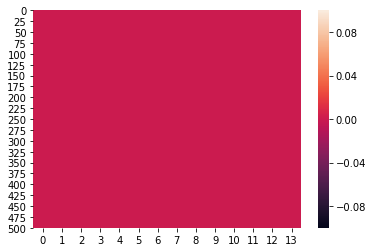

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
X=df.iloc[:,0:13]
Y=df.iloc[:,13]

In [14]:
# Creating basic Neural Network Model

In [15]:
def create_model():
    model=Sequential()
    model.add(Dense(18,kernel_initializer='normal',activation='relu',input_dim=X.shape[1]))
    model.add(Dense(12,kernel_initializer='normal',activation='relu'))
    model.add(Dense(1,kernel_initializer='normal'))
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

In [17]:
model=KerasRegressor(build_fn=create_model,epochs=150,batch_size=10)
kfold=KFold(n_splits=10,random_state=42)
scores=cross_val_score(estimator=model,X=X,y=Y,cv=kfold)
print('Results: %.2f (%.2f) MSE'% (scores.mean(),scores.std()))

Epoch 1/150
455/455 [==============================] - 3s 6ms/step - loss: 542.7311
Epoch 2/150
455/455 [==============================] - 0s 185us/step - loss: 199.6227
Epoch 3/150
455/455 [==============================] - 0s 201us/step - loss: 109.4500
Epoch 4/150
455/455 [==============================] - 0s 175us/step - loss: 90.3947
Epoch 5/150
455/455 [==============================] - 0s 185us/step - loss: 80.4109
Epoch 6/150
455/455 [==============================] - 0s 290us/step - loss: 72.3647
Epoch 7/150
455/455 [==============================] - 0s 290us/step - loss: 68.8192
Epoch 8/150
455/455 [==============================] - 0s 299us/step - loss: 67.0775: 0s - loss: 62.3
Epoch 9/150
455/455 [==============================] - 0s 510us/step - loss: 67.1158
Epoch 10/150
455/455 [==============================] - 0s 431us/step - loss: 66.6309
Epoch 11/150
455/455 [==============================] - 0s 229us/step - loss: 64.6031
Epoch 12/150
455/455 [=======================

Epoch 96/150
455/455 [==============================] - 0s 281us/step - loss: 20.2868
Epoch 97/150
455/455 [==============================] - 0s 281us/step - loss: 19.4546
Epoch 98/150
455/455 [==============================] - 0s 158us/step - loss: 19.7288
Epoch 99/150
455/455 [==============================] - 0s 158us/step - loss: 19.5626
Epoch 100/150
455/455 [==============================] - 0s 211us/step - loss: 19.0959
Epoch 101/150
455/455 [==============================] - 0s 211us/step - loss: 19.1161
Epoch 102/150
455/455 [==============================] - 0s 255us/step - loss: 20.4244
Epoch 103/150
455/455 [==============================] - 0s 162us/step - loss: 18.9837
Epoch 104/150
455/455 [==============================] - 0s 161us/step - loss: 18.9050
Epoch 105/150
455/455 [==============================] - 0s 178us/step - loss: 19.0354
Epoch 106/150
455/455 [==============================] - 0s 163us/step - loss: 18.9677
Epoch 107/150
455/455 [========================

455/455 [==============================] - 0s 226us/step - loss: 30.8508
Epoch 40/150
455/455 [==============================] - 0s 191us/step - loss: 32.1410
Epoch 41/150
455/455 [==============================] - 0s 176us/step - loss: 29.0743
Epoch 42/150
455/455 [==============================] - 0s 182us/step - loss: 29.2577
Epoch 43/150
455/455 [==============================] - 0s 176us/step - loss: 28.0189
Epoch 44/150
455/455 [==============================] - 0s 167us/step - loss: 27.8852
Epoch 45/150
455/455 [==============================] - 0s 193us/step - loss: 27.0518
Epoch 46/150
455/455 [==============================] - 0s 316us/step - loss: 27.0864
Epoch 47/150
455/455 [==============================] - 0s 290us/step - loss: 27.9068
Epoch 48/150
455/455 [==============================] - 0s 193us/step - loss: 26.3870
Epoch 49/150
455/455 [==============================] - 0s 260us/step - loss: 25.5247
Epoch 50/150
455/455 [==============================] - 0s 507us/st

455/455 [==============================] - 0s 202us/step - loss: 16.9848
Epoch 135/150
455/455 [==============================] - 0s 185us/step - loss: 17.7922
Epoch 136/150
455/455 [==============================] - 0s 246us/step - loss: 18.4118
Epoch 137/150
455/455 [==============================] - 0s 158us/step - loss: 17.5255
Epoch 138/150
455/455 [==============================] - 0s 176us/step - loss: 17.9617
Epoch 139/150
455/455 [==============================] - 0s 176us/step - loss: 17.4671
Epoch 140/150
455/455 [==============================] - 0s 159us/step - loss: 16.7886
Epoch 141/150
455/455 [==============================] - 0s 167us/step - loss: 19.5613
Epoch 142/150
455/455 [==============================] - 0s 158us/step - loss: 17.4079
Epoch 143/150
455/455 [==============================] - 0s 185us/step - loss: 17.6299
Epoch 144/150
455/455 [==============================] - 0s 176us/step - loss: 16.4444
Epoch 145/150
455/455 [==============================] - 

455/455 [==============================] - 0s 255us/step - loss: 23.4339
Epoch 79/150
455/455 [==============================] - 0s 167us/step - loss: 23.2955
Epoch 80/150
455/455 [==============================] - 0s 176us/step - loss: 23.5392
Epoch 81/150
455/455 [==============================] - 0s 193us/step - loss: 22.7503
Epoch 82/150
455/455 [==============================] - 0s 193us/step - loss: 23.4963
Epoch 83/150
455/455 [==============================] - 0s 229us/step - loss: 22.9178
Epoch 84/150
455/455 [==============================] - 0s 489us/step - loss: 23.5568
Epoch 85/150
455/455 [==============================] - 0s 308us/step - loss: 26.73500s - loss: 26.
Epoch 86/150
455/455 [==============================] - 0s 167us/step - loss: 23.8820
Epoch 87/150
455/455 [==============================] - 0s 161us/step - loss: 22.5909
Epoch 88/150
455/455 [==============================] - ETA: 0s - loss: 24.82 - 0s 167us/step - loss: 22.3280
Epoch 89/150
455/455 [=======

455/455 [==============================] - 0s 185us/step - loss: 41.8258
Epoch 22/150
455/455 [==============================] - 0s 180us/step - loss: 40.2423
Epoch 23/150
455/455 [==============================] - 0s 174us/step - loss: 39.8485
Epoch 24/150
455/455 [==============================] - 0s 157us/step - loss: 38.8689
Epoch 25/150
455/455 [==============================] - 0s 328us/step - loss: 36.8903
Epoch 26/150
455/455 [==============================] - 0s 255us/step - loss: 37.3377
Epoch 27/150
455/455 [==============================] - 0s 279us/step - loss: 36.2895
Epoch 28/150
455/455 [==============================] - 0s 174us/step - loss: 34.6205
Epoch 29/150
455/455 [==============================] - 0s 157us/step - loss: 34.8275
Epoch 30/150
455/455 [==============================] - 0s 164us/step - loss: 33.8397
Epoch 31/150
455/455 [==============================] - 0s 245us/step - loss: 32.9359
Epoch 32/150
455/455 [==============================] - 0s 186us/st

455/455 [==============================] - 0s 373us/step - loss: 17.3119
Epoch 117/150
455/455 [==============================] - 0s 149us/step - loss: 18.3508
Epoch 118/150
455/455 [==============================] - 0s 156us/step - loss: 18.6292
Epoch 119/150
455/455 [==============================] - 0s 167us/step - loss: 18.8442
Epoch 120/150
455/455 [==============================] - 0s 163us/step - loss: 18.7881
Epoch 121/150
455/455 [==============================] - 0s 158us/step - loss: 18.0676
Epoch 122/150
455/455 [==============================] - 0s 163us/step - loss: 18.1311
Epoch 123/150
455/455 [==============================] - 0s 227us/step - loss: 17.4105
Epoch 124/150
455/455 [==============================] - 0s 237us/step - loss: 19.1292
Epoch 125/150
455/455 [==============================] - 0s 284us/step - loss: 18.2873
Epoch 126/150
455/455 [==============================] - 0s 192us/step - loss: 18.0587
Epoch 127/150
455/455 [==============================] - 

455/455 [==============================] - 0s 325us/step - loss: 22.8188
Epoch 61/150
455/455 [==============================] - 0s 217us/step - loss: 23.5490
Epoch 62/150
455/455 [==============================] - 0s 211us/step - loss: 22.5000
Epoch 63/150
455/455 [==============================] - 0s 229us/step - loss: 22.6529
Epoch 64/150
455/455 [==============================] - 0s 238us/step - loss: 22.1222
Epoch 65/150
455/455 [==============================] - 0s 281us/step - loss: 23.3279
Epoch 66/150
455/455 [==============================] - 0s 220us/step - loss: 22.4917
Epoch 67/150
455/455 [==============================] - 0s 212us/step - loss: 23.9567
Epoch 68/150
455/455 [==============================] - 0s 167us/step - loss: 21.1776
Epoch 69/150
455/455 [==============================] - 0s 201us/step - loss: 20.8956
Epoch 70/150
455/455 [==============================] - 0s 298us/step - loss: 21.2604
Epoch 71/150
455/455 [==============================] - 0s 318us/st

455/455 [==============================] - 0s 344us/step - loss: 72.6692
Epoch 5/150
455/455 [==============================] - 0s 280us/step - loss: 65.0760
Epoch 6/150
455/455 [==============================] - 0s 158us/step - loss: 61.2839
Epoch 7/150
455/455 [==============================] - ETA: 0s - loss: 57.17 - 0s 163us/step - loss: 58.1954
Epoch 8/150
455/455 [==============================] - 0s 166us/step - loss: 56.7887
Epoch 9/150
455/455 [==============================] - 0s 167us/step - loss: 55.8198
Epoch 10/150
455/455 [==============================] - 0s 181us/step - loss: 54.0795
Epoch 11/150
455/455 [==============================] - 0s 176us/step - loss: 53.2241
Epoch 12/150
455/455 [==============================] - 0s 158us/step - loss: 51.7533
Epoch 13/150
455/455 [==============================] - 0s 163us/step - loss: 51.4267
Epoch 14/150
455/455 [==============================] - 0s 166us/step - loss: 49.5718
Epoch 15/150
455/455 [==========================

455/455 [==============================] - 0s 281us/step - loss: 18.7940
Epoch 99/150
455/455 [==============================] - 0s 298us/step - loss: 18.3332
Epoch 100/150
455/455 [==============================] - 0s 264us/step - loss: 19.6983
Epoch 101/150
455/455 [==============================] - 0s 164us/step - loss: 18.1731
Epoch 102/150
455/455 [==============================] - 0s 157us/step - loss: 18.4752
Epoch 103/150
455/455 [==============================] - 0s 201us/step - loss: 17.7335
Epoch 104/150
455/455 [==============================] - 0s 166us/step - loss: 19.0722
Epoch 105/150
455/455 [==============================] - 0s 175us/step - loss: 19.5024
Epoch 106/150
455/455 [==============================] - 0s 176us/step - loss: 18.9682
Epoch 107/150
455/455 [==============================] - 0s 193us/step - loss: 17.9664
Epoch 108/150
455/455 [==============================] - 0s 193us/step - loss: 17.4587
Epoch 109/150
455/455 [==============================] - 0

456/456 [==============================] - 0s 175us/step - loss: 30.8027
Epoch 43/150
456/456 [==============================] - 0s 183us/step - loss: 30.2009
Epoch 44/150
456/456 [==============================] - 0s 263us/step - loss: 29.8502
Epoch 45/150
456/456 [==============================] - 0s 184us/step - loss: 28.8603
Epoch 46/150
456/456 [==============================] - 0s 184us/step - loss: 28.2029
Epoch 47/150
456/456 [==============================] - 0s 167us/step - loss: 28.2694
Epoch 48/150
456/456 [==============================] - 0s 176us/step - loss: 27.9663
Epoch 49/150
456/456 [==============================] - 0s 178us/step - loss: 27.7669
Epoch 50/150
456/456 [==============================] - 0s 244us/step - loss: 28.1152
Epoch 51/150
456/456 [==============================] - 0s 265us/step - loss: 26.9581
Epoch 52/150
456/456 [==============================] - 0s 275us/step - loss: 27.8230
Epoch 53/150
456/456 [==============================] - 0s 183us/st

456/456 [==============================] - 0s 228us/step - loss: 16.4083
Epoch 137/150
456/456 [==============================] - 0s 246us/step - loss: 16.7998
Epoch 138/150
456/456 [==============================] - 0s 160us/step - loss: 16.8927
Epoch 139/150
456/456 [==============================] - 0s 183us/step - loss: 15.7528
Epoch 140/150
456/456 [==============================] - 0s 165us/step - loss: 15.7373
Epoch 141/150
456/456 [==============================] - 0s 165us/step - loss: 16.5188
Epoch 142/150
456/456 [==============================] - 0s 271us/step - loss: 16.2401
Epoch 143/150
456/456 [==============================] - 0s 180us/step - loss: 17.3150
Epoch 144/150
456/456 [==============================] - 0s 163us/step - loss: 16.5941
Epoch 145/150
456/456 [==============================] - 0s 184us/step - loss: 15.8013
Epoch 146/150
456/456 [==============================] - 0s 184us/step - loss: 16.4624
Epoch 147/150
456/456 [==============================] - 

456/456 [==============================] - 0s 256us/step - loss: 16.5499
Epoch 81/150
456/456 [==============================] - 0s 182us/step - loss: 17.1383
Epoch 82/150
456/456 [==============================] - 0s 153us/step - loss: 16.0954
Epoch 83/150
456/456 [==============================] - 0s 158us/step - loss: 16.4082
Epoch 84/150
456/456 [==============================] - 0s 158us/step - loss: 15.6361
Epoch 85/150
456/456 [==============================] - 0s 151us/step - loss: 15.3178
Epoch 86/150
456/456 [==============================] - 0s 166us/step - loss: 15.9626
Epoch 87/150
456/456 [==============================] - 0s 157us/step - loss: 15.6474
Epoch 88/150
456/456 [==============================] - 0s 154us/step - loss: 14.8012
Epoch 89/150
456/456 [==============================] - 0s 151us/step - loss: 15.2115
Epoch 90/150
456/456 [==============================] - 0s 151us/step - loss: 15.0820
Epoch 91/150
456/456 [==============================] - 0s 153us/st

456/456 [==============================] - ETA: 0s - loss: 37.77 - 0s 161us/step - loss: 40.6946
Epoch 25/150
456/456 [==============================] - 0s 175us/step - loss: 41.4608
Epoch 26/150
456/456 [==============================] - 0s 167us/step - loss: 39.2287
Epoch 27/150
456/456 [==============================] - 0s 158us/step - loss: 37.0342
Epoch 28/150
456/456 [==============================] - 0s 167us/step - loss: 36.1080
Epoch 29/150
456/456 [==============================] - 0s 192us/step - loss: 36.0390
Epoch 30/150
456/456 [==============================] - 0s 228us/step - loss: 33.8359
Epoch 31/150
456/456 [==============================] - 0s 193us/step - loss: 34.8566
Epoch 32/150
456/456 [==============================] - 0s 157us/step - loss: 34.4930
Epoch 33/150
456/456 [==============================] - 0s 158us/step - loss: 32.1053
Epoch 34/150
456/456 [==============================] - 0s 171us/step - loss: 31.4865
Epoch 35/150
456/456 [=====================

456/456 [==============================] - 0s 454us/step - loss: 17.3576
Epoch 119/150
456/456 [==============================] - 0s 275us/step - loss: 15.4947
Epoch 120/150
456/456 [==============================] - 0s 171us/step - loss: 17.1467
Epoch 121/150
456/456 [==============================] - 0s 103us/step - loss: 16.5537
Epoch 122/150
456/456 [==============================] - 0s 103us/step - loss: 15.6486
Epoch 123/150
456/456 [==============================] - 0s 123us/step - loss: 15.1446
Epoch 124/150
456/456 [==============================] - 0s 137us/step - loss: 15.5614
Epoch 125/150
456/456 [==============================] - 0s 171us/step - loss: 16.0308
Epoch 126/150
456/456 [==============================] - 0s 174us/step - loss: 16.8003
Epoch 127/150
456/456 [==============================] - 0s 158us/step - loss: 16.3318
Epoch 128/150
456/456 [==============================] - 0s 158us/step - loss: 15.0024
Epoch 129/150
456/456 [==============================] - 

456/456 [==============================] - 0s 464us/step - loss: 20.6158
Epoch 63/150
456/456 [==============================] - ETA: 0s - loss: 20.06 - 0s 395us/step - loss: 20.1316
Epoch 64/150
456/456 [==============================] - 0s 334us/step - loss: 19.6346
Epoch 65/150
456/456 [==============================] - 0s 272us/step - loss: 20.4254
Epoch 66/150
456/456 [==============================] - 0s 298us/step - loss: 19.8492
Epoch 67/150
456/456 [==============================] - 0s 430us/step - loss: 20.6848
Epoch 68/150
456/456 [==============================] - 0s 263us/step - loss: 21.3961
Epoch 69/150
456/456 [==============================] - 0s 298us/step - loss: 20.3358
Epoch 70/150
456/456 [==============================] - 0s 438us/step - loss: 19.2342
Epoch 71/150
456/456 [==============================] - 0s 596us/step - loss: 22.1648
Epoch 72/150
456/456 [==============================] - 0s 535us/step - loss: 19.5395
Epoch 73/150
456/456 [=====================